- Siehe NB 2115 für vorherige Analysen

- **Bestes bisher: 150**
- Geringste Anzahl an manuellen Eingriffen (dennoch mehr als in der Baseline!), aber einige Wünsche wir die am Freitag werden tatsächlich berücksichtigt

- Das permanente verändern der Setpoints führt zu einem erhöhten Energieverbrauch, bisher keine Möglichkeit gefunden, dies dem Modell abzugewöhnen

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import sys
import ast
import pickle

glp = os.path.abspath("../code")
if not glp in sys.path: sys.path.append( glp )

from global_paths import global_paths

if not global_paths["COBS"] in sys.path: sys.path.append( global_paths["COBS"] )

In [3]:
import cobs
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

In [4]:
import StateUtilities as SU

In [5]:
import visualization_helper_v2 as vh

In [6]:
fig_width = 30

In [7]:
dirnames = ["../checkpoints/b001/",
            "../checkpoints/s147/20210518-1637/",
            "../checkpoints/s149/20210521-1415/",
            "../checkpoints/s150/20210521-1417/"]

In [8]:
alldfs = [ vh.convert_sqlite_to_df(dirname) for dirname in dirnames ]

Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.
Table eels convertet to a pandas dataframe.
Table sees convertet to a pandas dataframe.
Table seesea convertet to a pandas dataframe.
Table sees_er convertet to a pandas dataframe.


In [9]:
q_values = vh.load_and_convert_q_values(dirnames)

No Q-value list found for ../checkpoints/b001/.
No Q-value list found for ../checkpoints/s149/20210521-1415/.
No Q-value list found for ../checkpoints/s150/20210521-1417/.


In [10]:
vh.get_arguments_overview(dirnames)

b001  \
algorithm                           baseline_rule-based   
lr                                                 0.01   
discount_factor                                     0.9   
batch_size                                          128   
lambda_rwd_mstpc                                    0.1   
lambda_rwd_energy                                 5e-06   
reward_offset                                       0.0   
stp_reward_step_offset                              0.0   
target_network_update_freq                            3   
epsilon_final_step                                  100   
episodes_count                                      100   
agent_network                    2HiddenLayer,Trapezium   
agent_init_gain                                     0.8   
agent_w_l2                                        1e-05   
network_storage_frequency                            10   
shared_network_per_agent_class                        0   
model                           Building_5ZoneAirCooled   
single_setpoint_agent_count                         all   
next_occ_horizont                                     0   

                                                                  s147  \
algorithm                                                         ddqn   
lr                                                                0.04   
discount_factor                                                   0.85   
batch_size                                                         256   
lambda_rwd_mstpc                                                   0.1   
lambda_rwd_energy                                                5e-06   
reward_offset                                                     0.05   
stp_reward_step_offset                                             1.0   
target_network_update_freq                                           6   
epsilon_final_step                                               86400   
episodes_count                                                     160   
agent_network                              2HiddenLayer,Trapezium,SiLU   
agent_init_gain                                                    0.7   
agent_w_l2                                                       1e-06   
network_storage_frequency                                          160   
shared_network_per_agent_class                                       1   
model                           Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                                        NaN   
next_occ_horizont                                                    2   

                                                                  s149  \
algorithm                                                         ddqn   
lr                                                                0.08   
discount_factor                                                   0.85   
batch_size                                                         256   
lambda_rwd_mstpc                                                   0.1   
lambda_rwd_energy                                                5e-06   
reward_offset                                                     0.05   
stp_reward_step_offset                                             1.0   
target_network_update_freq                                           6   
epsilon_final_step                                              100800   
episodes_count                                                     160   
agent_network                              2HiddenLayer,Trapezium,SiLU   
agent_init_gain                                                    0.7   
agent_w_l2                                                       1e-06   
network_storage_frequency                                          160   
shared_network_per_agent_class                                       1   
model                           Building_5ZoneAirCooled_SingleSetpoint   
single_setpoint_agent_count                              

In [11]:
vh.get_runtime_overview_df(alldfs, dirnames)

b001           s147  \
Number of training episodes                      1.0   90927.000000   
Runtime in s                                     0.0  461472.119842   
Runtime in h                                     0.0     128.186700   
Mean episode runtime in s                        0.0       5.075194   
Mean episode runtime during eval. episode in s   0.0       5.280370   
Mean episode runtime after eval. episode in s    NaN       5.032768   
Mean episode runtime in no eval. episode in s    NaN       5.073904   

                                                         s149           s150  
Number of training episodes                     110016.000000  106857.000000  
Runtime in s                                    596803.707855  597146.200370  
Runtime in h                                       165.778808     165.873945  
Mean episode runtime in s                            5.424699       5.588274  
Mean episode runtime during eval. episode in s       5.605973       5.790317  
Mean episode runtime after eval. episode in s        5.338969       5.485226  
Mean episode runtime in no eval. episode in s        5.423560       5.587005

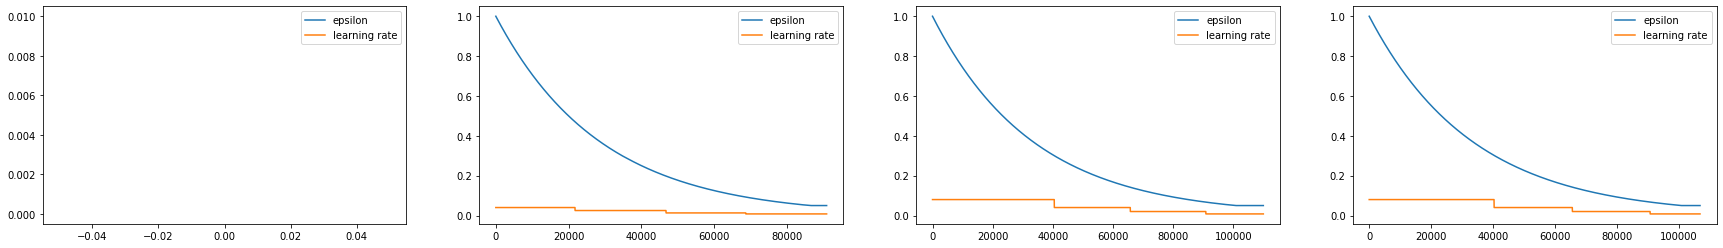

In [12]:
p, _ = vh.complete_plot_epsilon(alldfs, fig_width)
p.show()

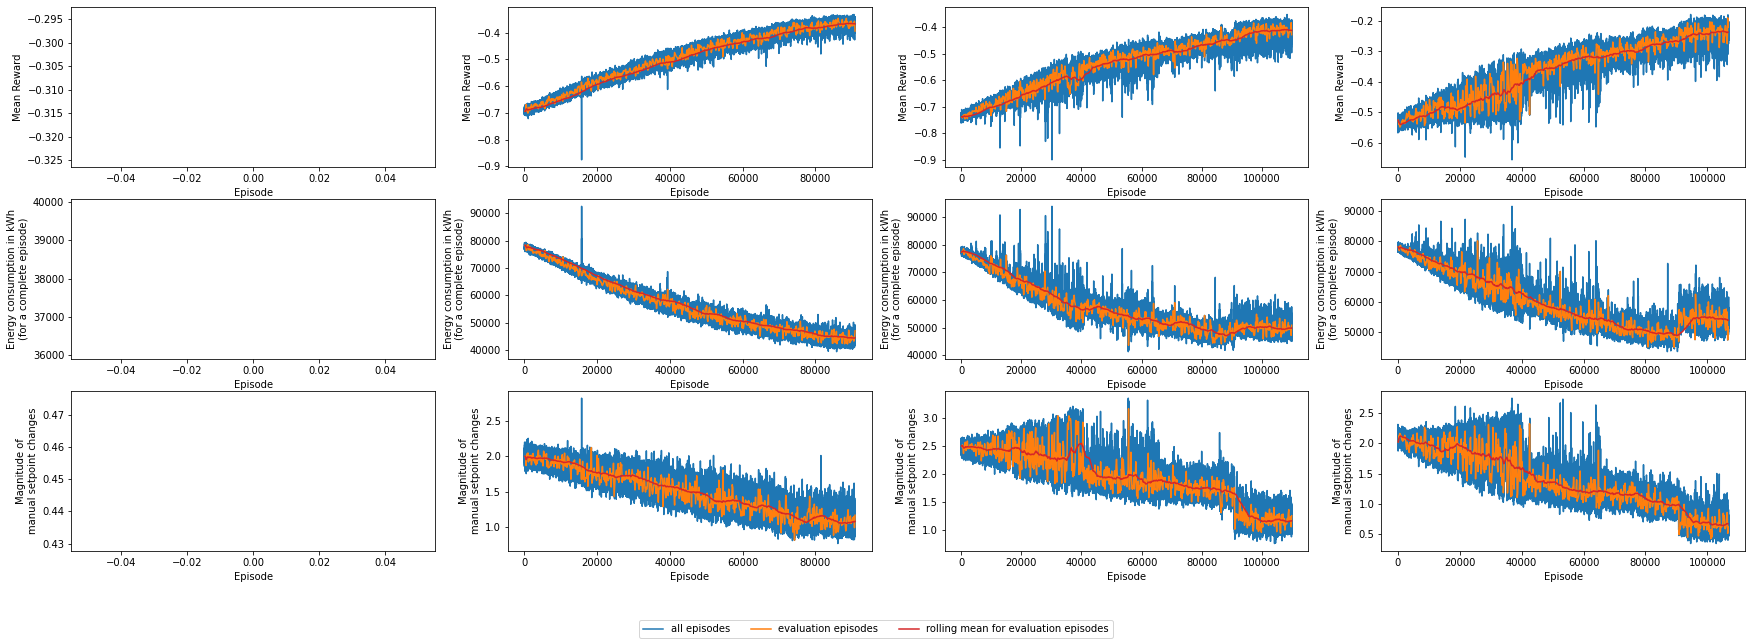

In [13]:
p, _ = vh.complete_plot_reward_stpc_econs(alldfs, fig_width)
p.show()

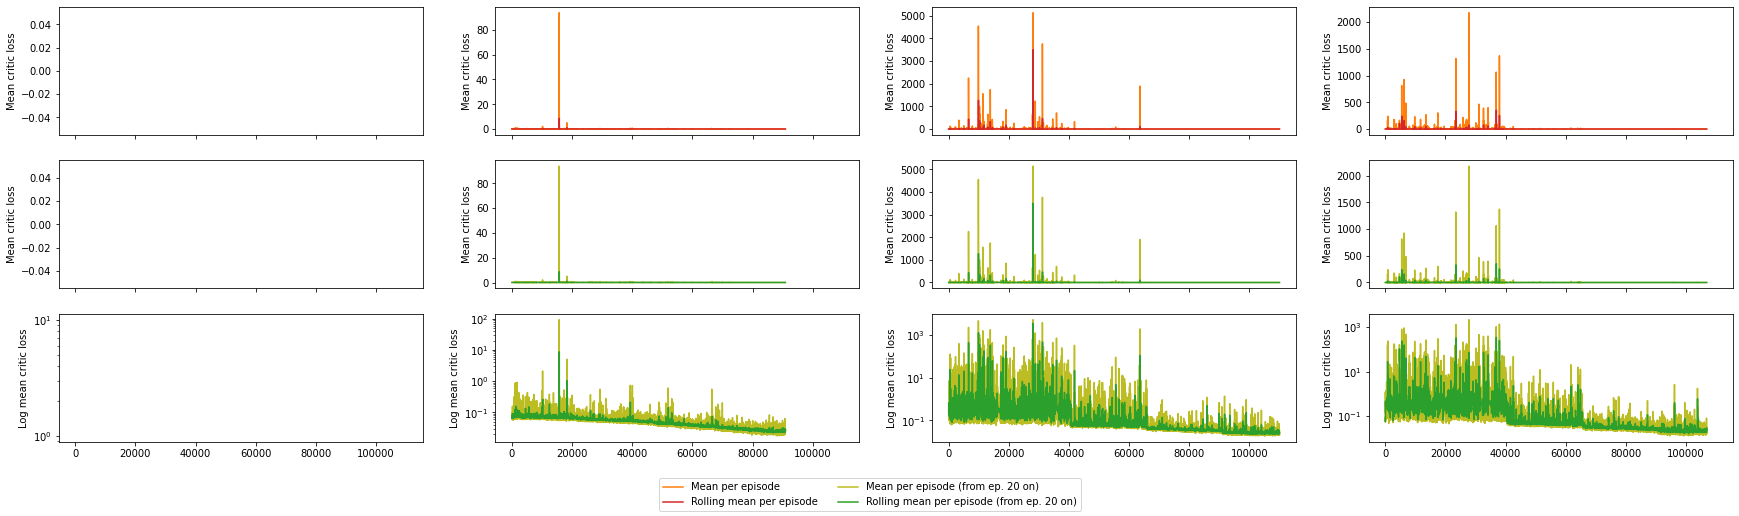

In [14]:
p, _ = vh.complete_plot_losses(alldfs, fig_width, with_agents=False)
p.show()

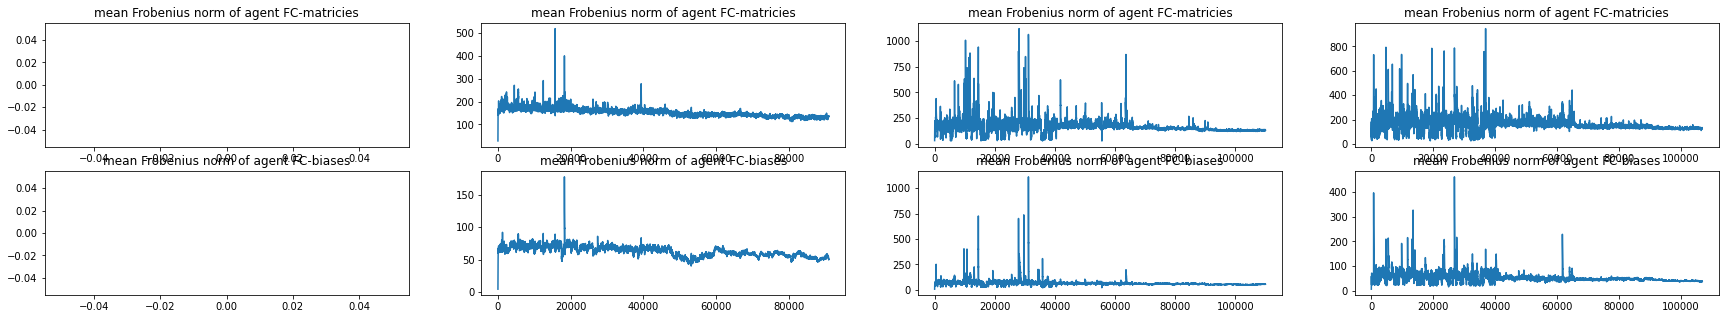

In [15]:
p, _ = vh.complete_plot_frobenius_norms(alldfs, fig_width, with_critics=False)
p.show()

In [16]:
last_available_eval_episodes = vh.compute_last_available_eval_episode(alldfs)

Last available evaluation episode for dfs0:      0
Last available evaluation episode for dfs1:  90879
Last available evaluation episode for dfs2: 109919
Last available evaluation episode for dfs3: 106719


<h3>Details for one week</h3>

In [17]:
#selected_episodes = [13120 - 1, 14480 - 1, 14480 - 1]
#selected_weeks    = [datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1), datetime.datetime(2017, 1, 1)]

In [18]:
if not "selected_episodes" in locals().keys():
    selected_episodes = last_available_eval_episodes.copy()
if not "selected_weeks" in locals().keys():
    # the start of the evaluation episode
    selected_weeks = [datetime.datetime.strptime(dfs['sees'].iloc[0]["datetime"], "%Y-%m-%d %H:%M:%S")
                      for dfs in alldfs]

subdfs = vh.select_week_and_episode_for_dfs_list(alldfs, selected_episodes, selected_weeks)

In [19]:
vh.print_reward_informations(subdfs, selected_episodes)

First complete week of evaluation episode
For episode     0: Energy consumption:   37992.70 kWh; Numer of setpoint changes: 325.4346284463498
For episode 90879: Energy consumption:   45974.75 kWh; Numer of setpoint changes: 828.8262715999363
For episode 109919: Energy consumption:   50909.50 kWh; Numer of setpoint changes: 897.6837770334861
For episode 106719: Energy consumption:   51599.77 kWh; Numer of setpoint changes: 439.49157014206236

Mean values for episode ...
...     0: Reward: -0.30947 kWh; Setpoint change magnit.:  0.45262; Energy cons.: 52841.03202
... 90879: Reward: -0.38499 kWh; Setpoint change magnit.:  1.15275; Energy cons.: 63942.62474
... 109919: Reward: -0.42888 kWh; Setpoint change magnit.:  1.24852; Energy cons.: 70805.98678
... 106719: Reward: -0.22110 kWh; Setpoint change magnit.:  0.61125; Energy cons.: 71766.02235


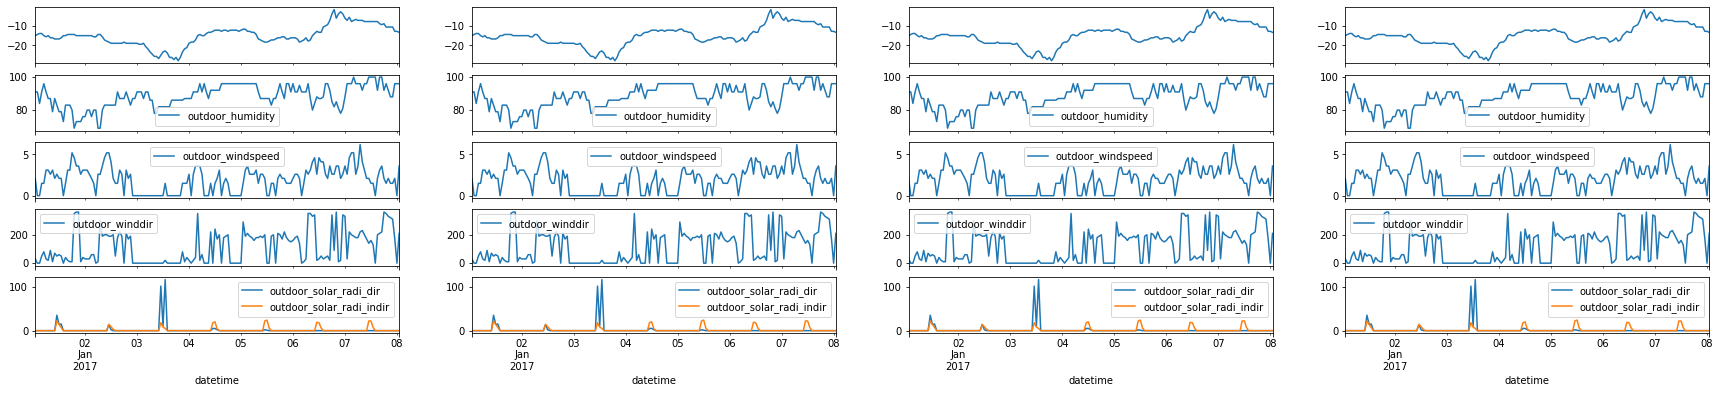

In [20]:
p, _ = vh.complete_plot_weather_information(subdfs, fig_width)
p.show()

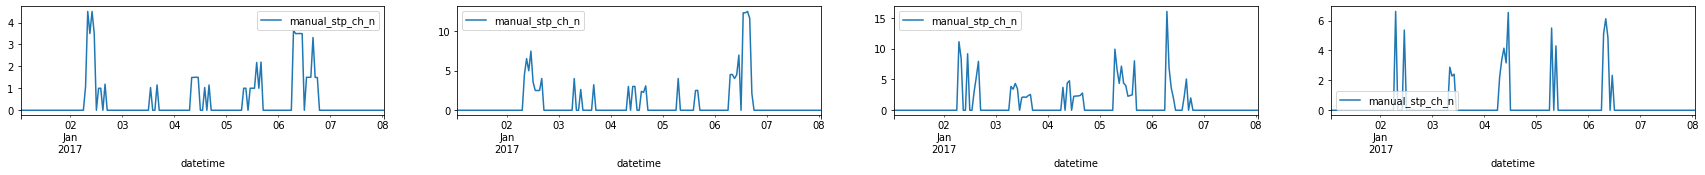

In [21]:
p, _ = vh.complete_plot_number_of_stp_ch(subdfs, fig_width)
p.show()

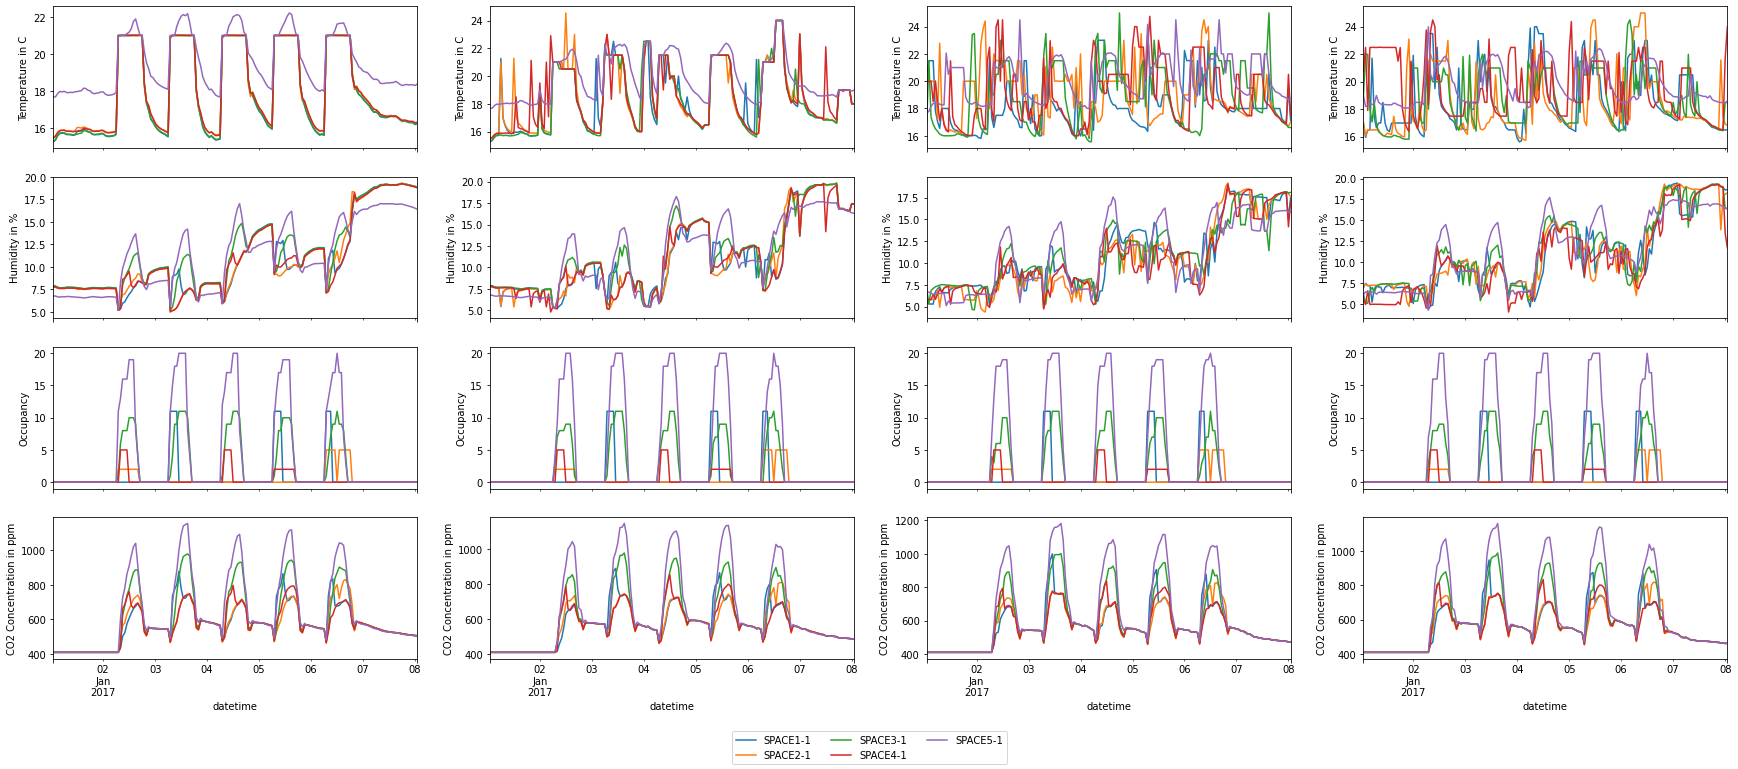

In [22]:
p, _ = vh.complete_plot_room_status(subdfs, fig_width)
p.show()

In [23]:
subdfs_rooms, subdfs_agents = vh.get_available_rooms_and_agents(subdfs)

No agent - controlled device pairing found for index 0
Available Rooms     in (sub-)dfs0: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs0: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

No agent - controlled device pairing found for index 1
Available Rooms     in (sub-)dfs1: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs1: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs2: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs2: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 

Available Rooms     in (sub-)dfs3: ['SPACE1-1' 'SPACE2-1' 'SPACE3-1' 'SPACE4-1' 'SPACE5-1']
Available Agent IDs in (sub-)dfs3: {'SPACE1-1': 0, 'SPACE2-1': 1, 'SPACE3-1': 2, 'SPACE4-1': 3, 'SPACE5-1': 4} 



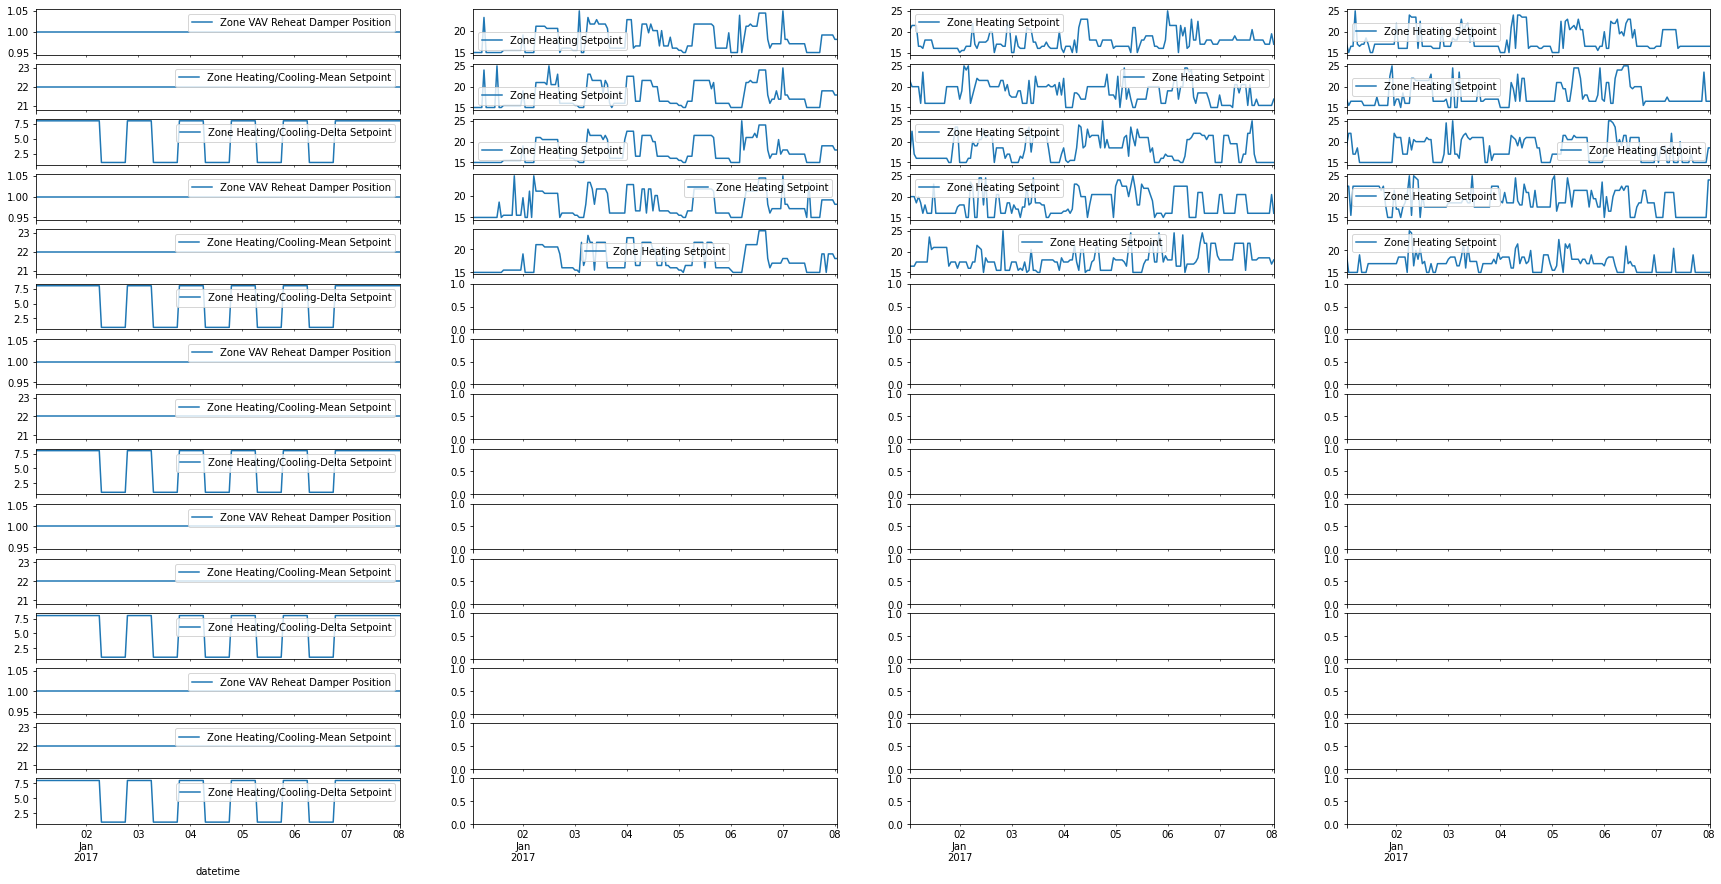

In [24]:
p, _ = vh.complete_plot_all_agent_outputs(subdfs, fig_width, subdfs_agents)
p.show()

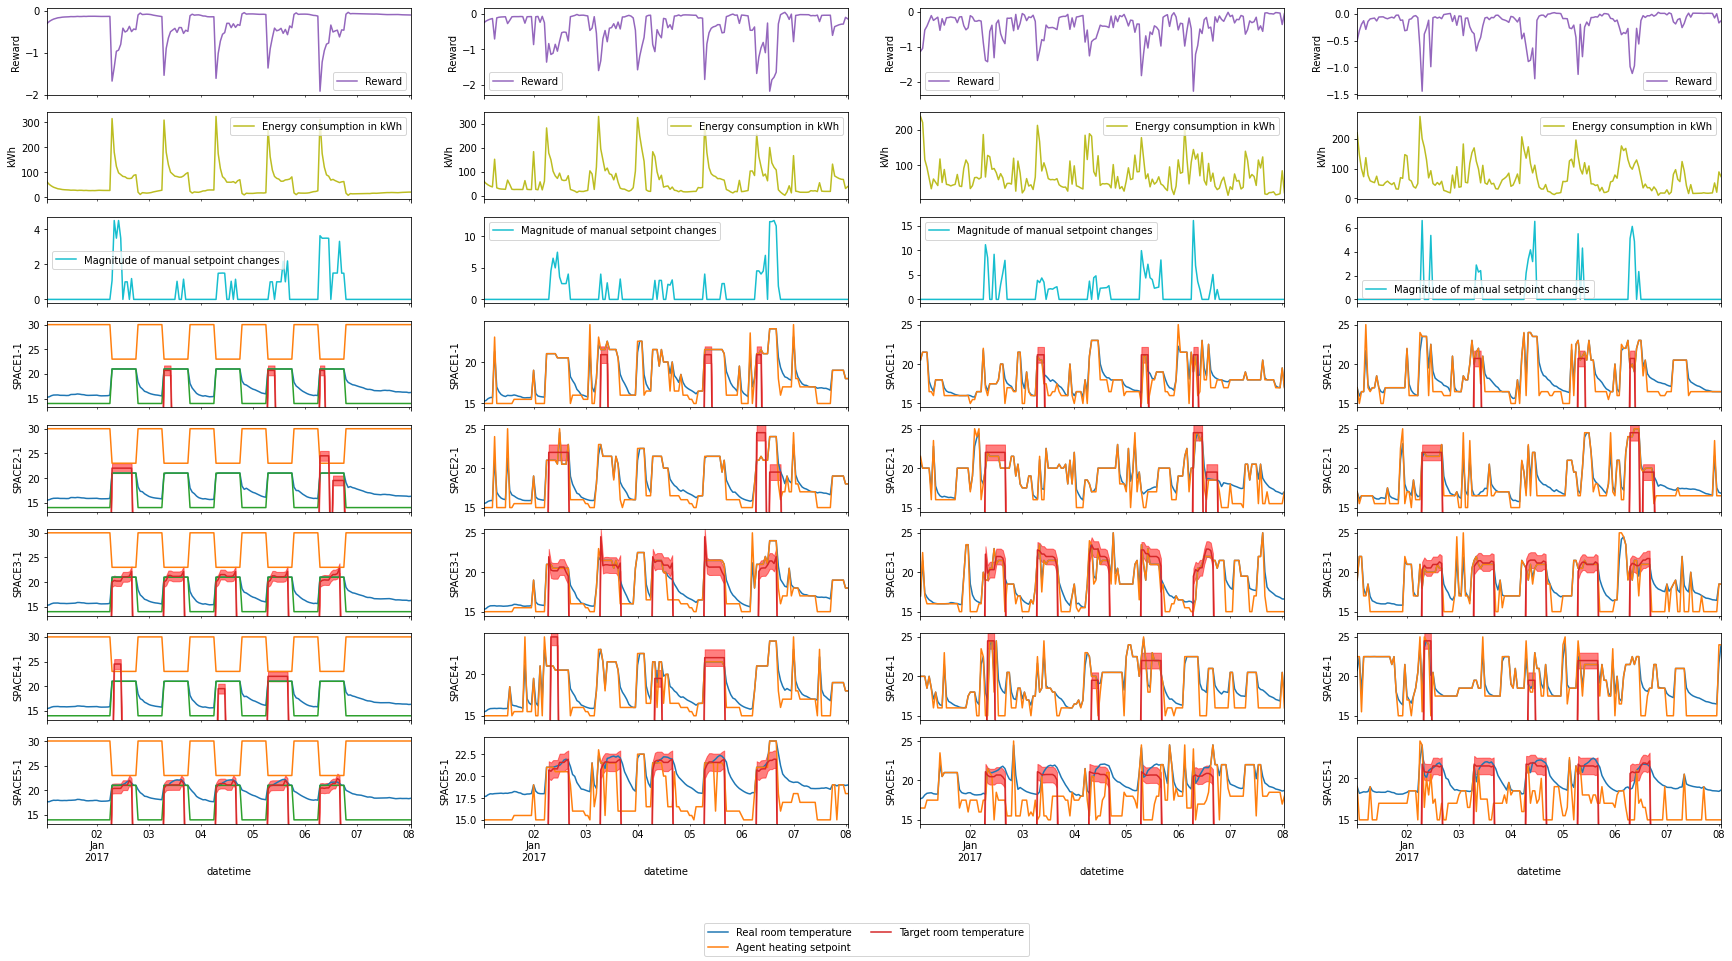

In [25]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a day</h3>

In [26]:
#selected_periods1    = [datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3),
#                        datetime.datetime(2017, 1, 3)]
#selected_periods1_end= [datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4),
#                        datetime.datetime(2017, 1, 4)]

In [27]:
if not "selected_periods1" in locals().keys():
    selected_periods1     = [datetime.datetime(2017, 1, 3) for _ in range(len(alldfs))]
if not "selected_periods1_end" in locals().keys():
    selected_periods1_end = [datetime.datetime(2017, 1, 4) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods1,
            selected_periods1_end)

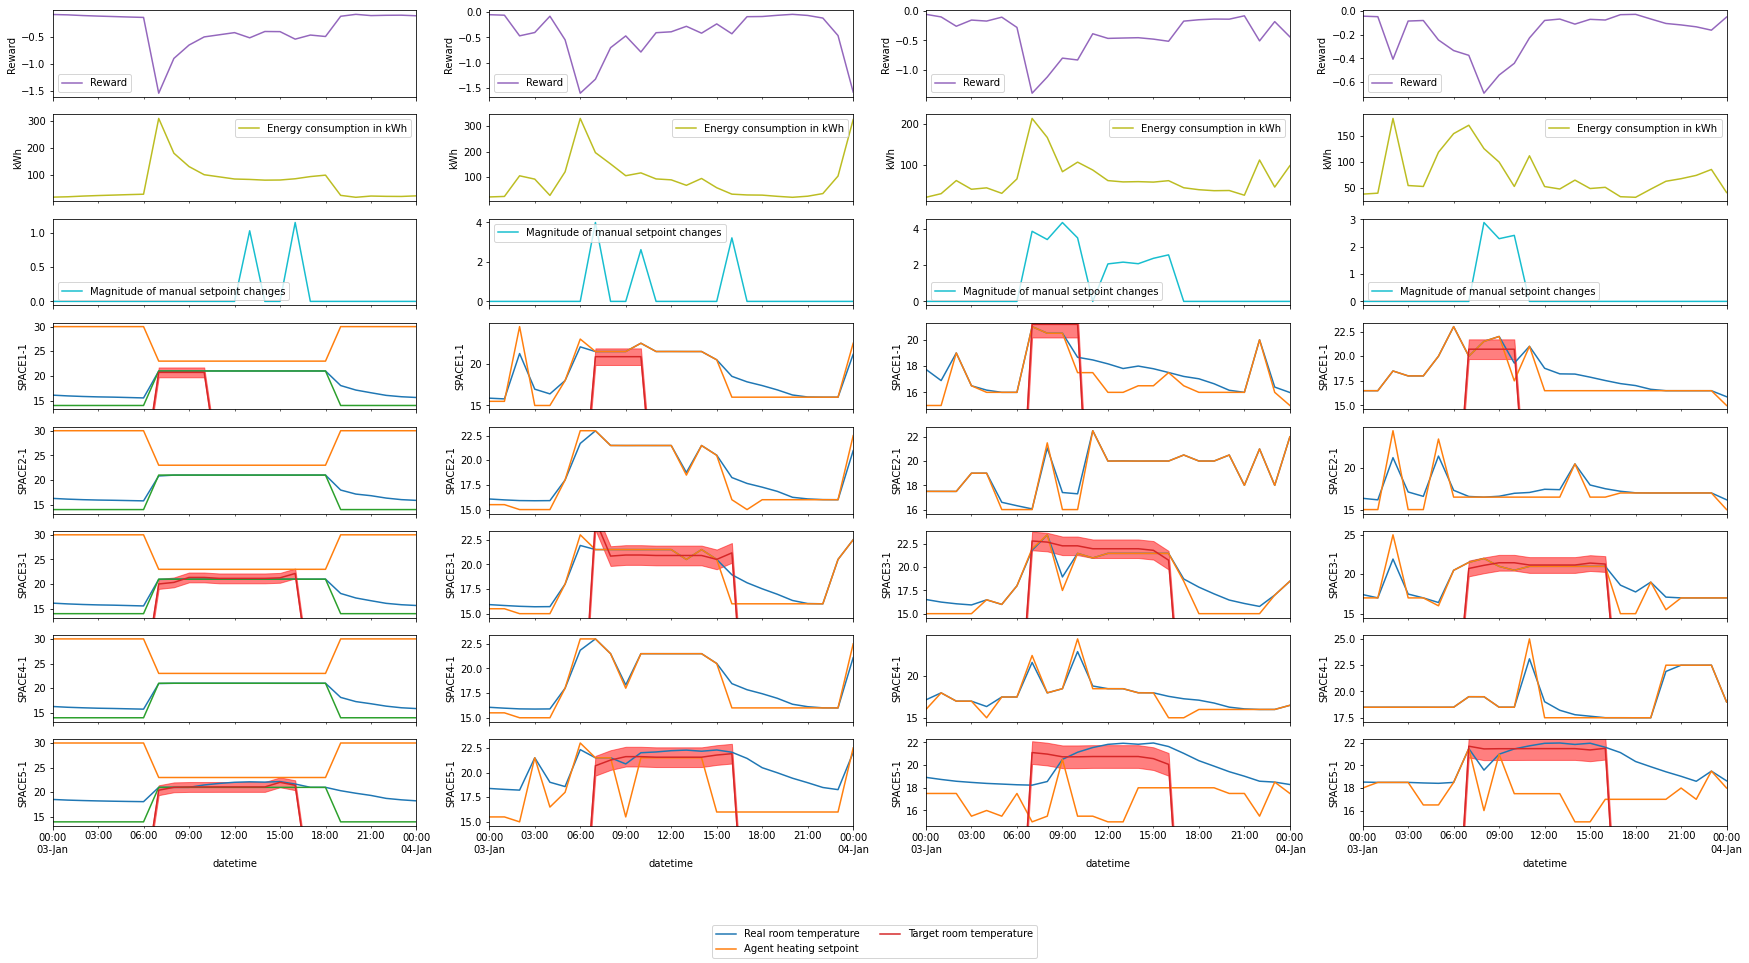

In [28]:
p, _ = vh.complete_plot_total_overview(subdfs, fig_width, subdfs_rooms, subdfs_agents)
p.show()

<h3>Details for a complete month</h3>

In [29]:
#selected_periods2    = [datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1),
#                        datetime.datetime(2017, 1, 1)]

In [30]:
if not "selected_periods2" in locals().keys():
    selected_periods2     = [datetime.datetime(2017, 1, 1) for _ in range(len(alldfs))]
selected_periods2_end = [datetime.datetime(2017, 1, 30) for _ in range(len(alldfs))]

subdfs = vh.select_week_and_episode_with_end_for_dfs_list(
            alldfs,
            selected_episodes,
            selected_periods2,
            selected_periods2_end)

For plot number 1, mean energy consumption =  51941.5 Wh, mean reward = -0.3035
For plot number 2, mean energy consumption =  63168.5 Wh, mean reward = -0.3800
For plot number 3, mean energy consumption =  70066.5 Wh, mean reward = -0.4210
For plot number 4, mean energy consumption =  71287.6 Wh, mean reward = -0.2199


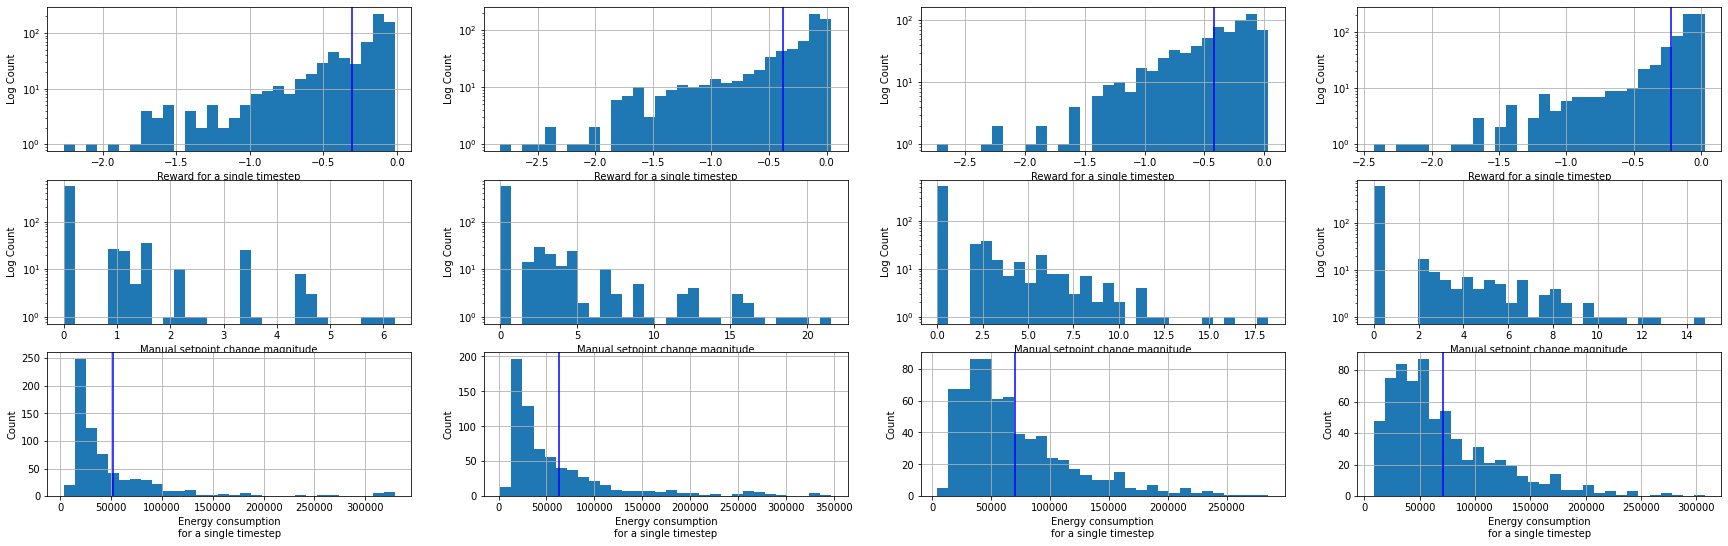

In [31]:
vh.plot_stpch_and_econs_distrib(subdfs, fig_width)

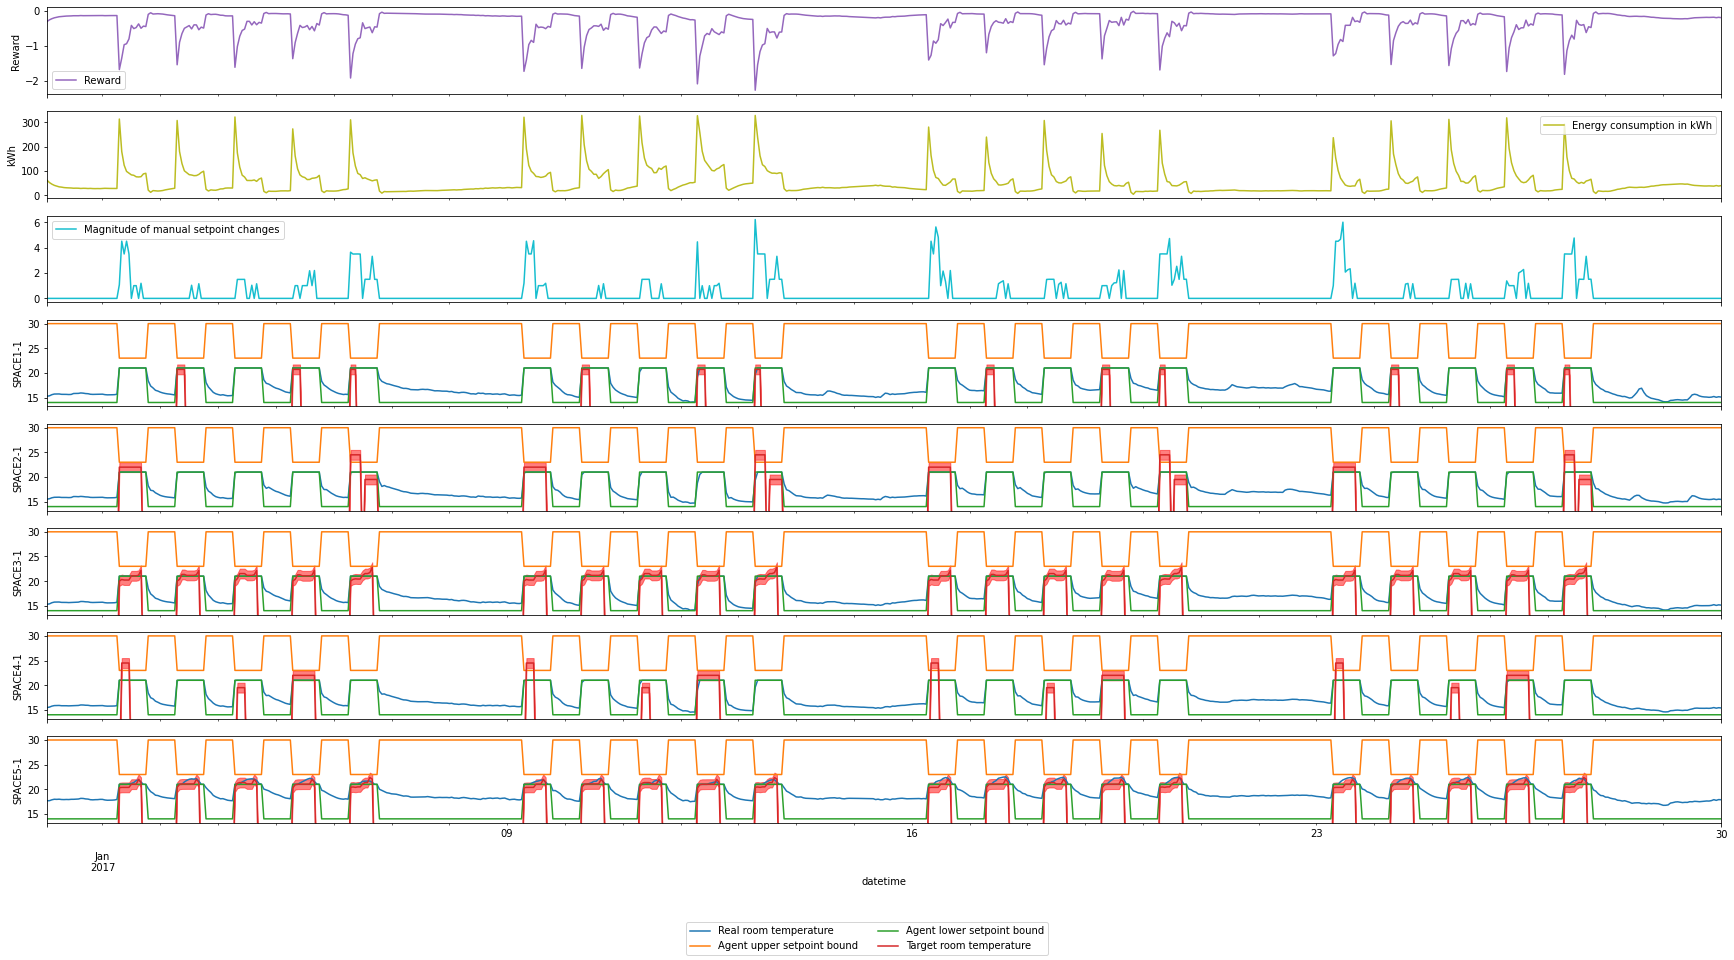

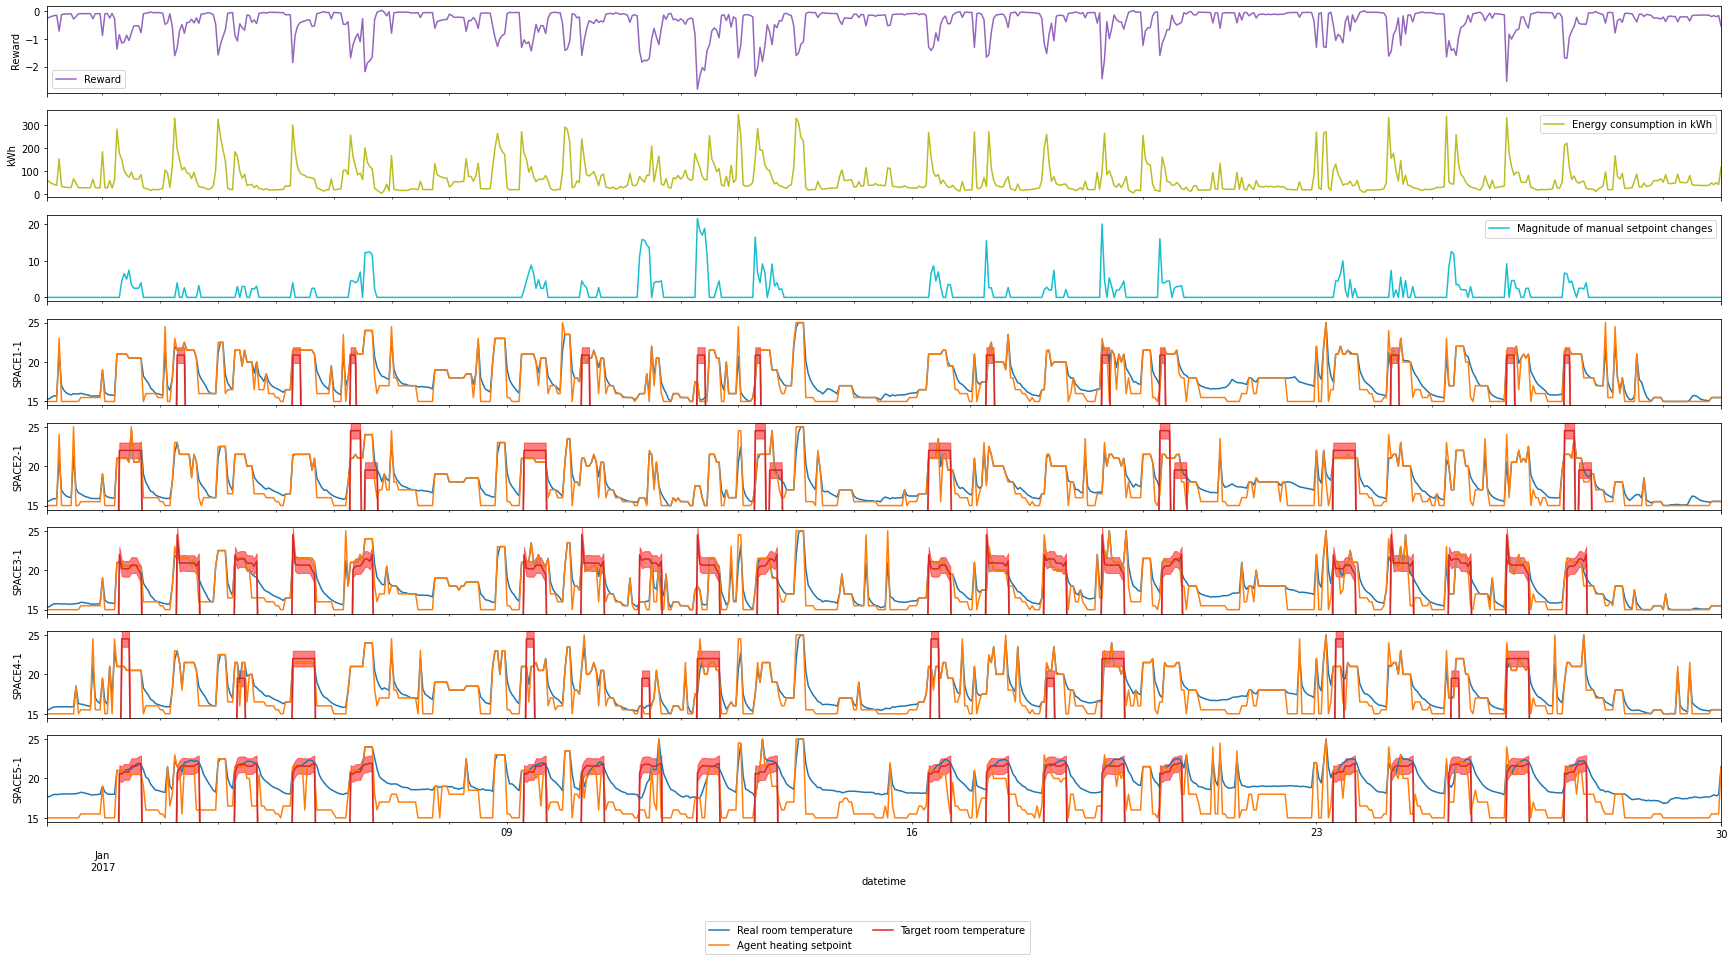

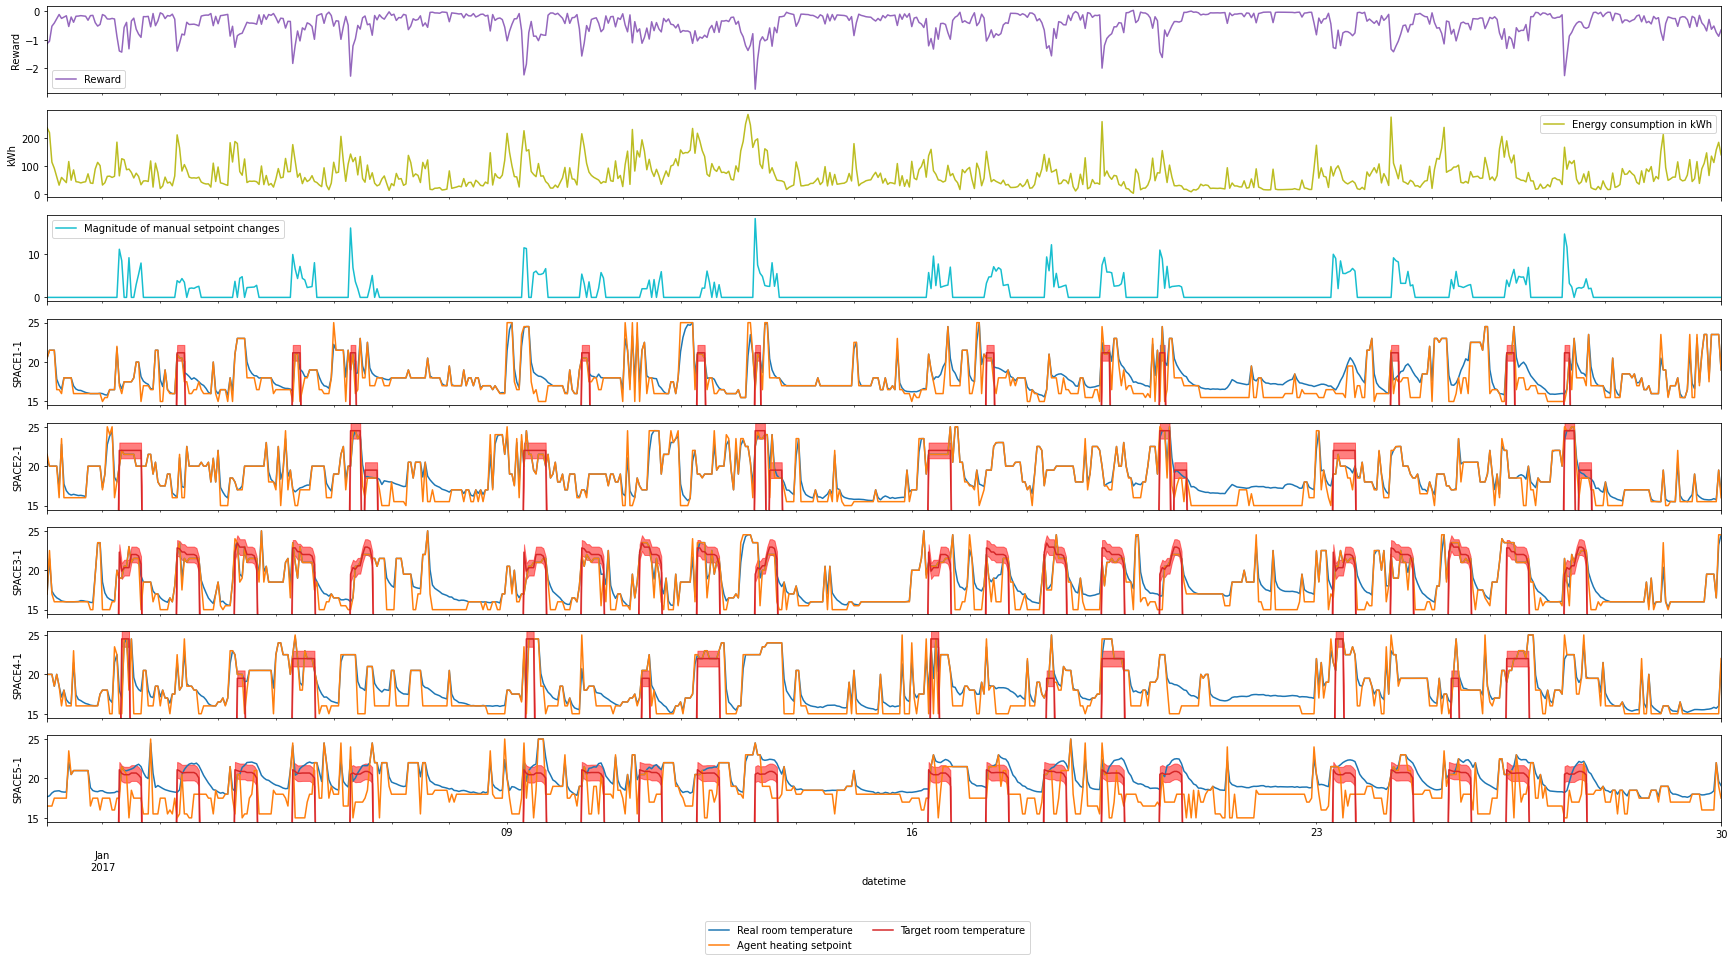

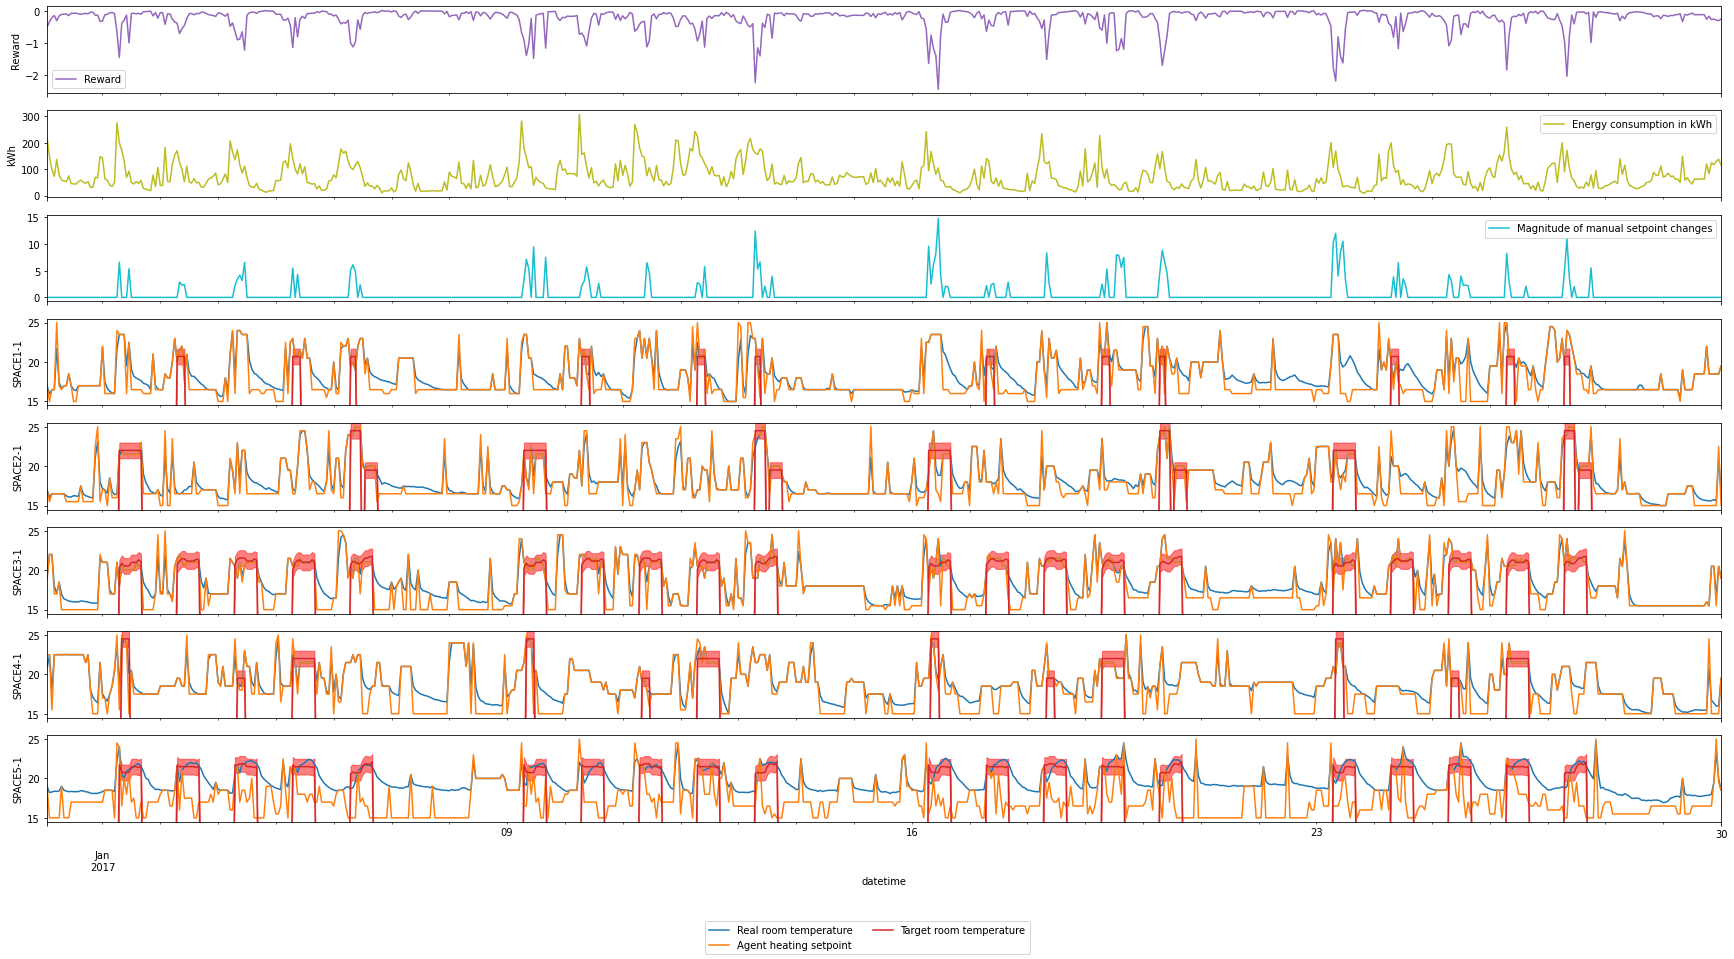

In [32]:
for idx, sdfs in enumerate(subdfs):
    p, _ = vh.complete_plot_total_overview(sdfs, fig_width,
                                           subdfs_rooms[idx],
                                           subdfs_agents[idx])
    p.show()

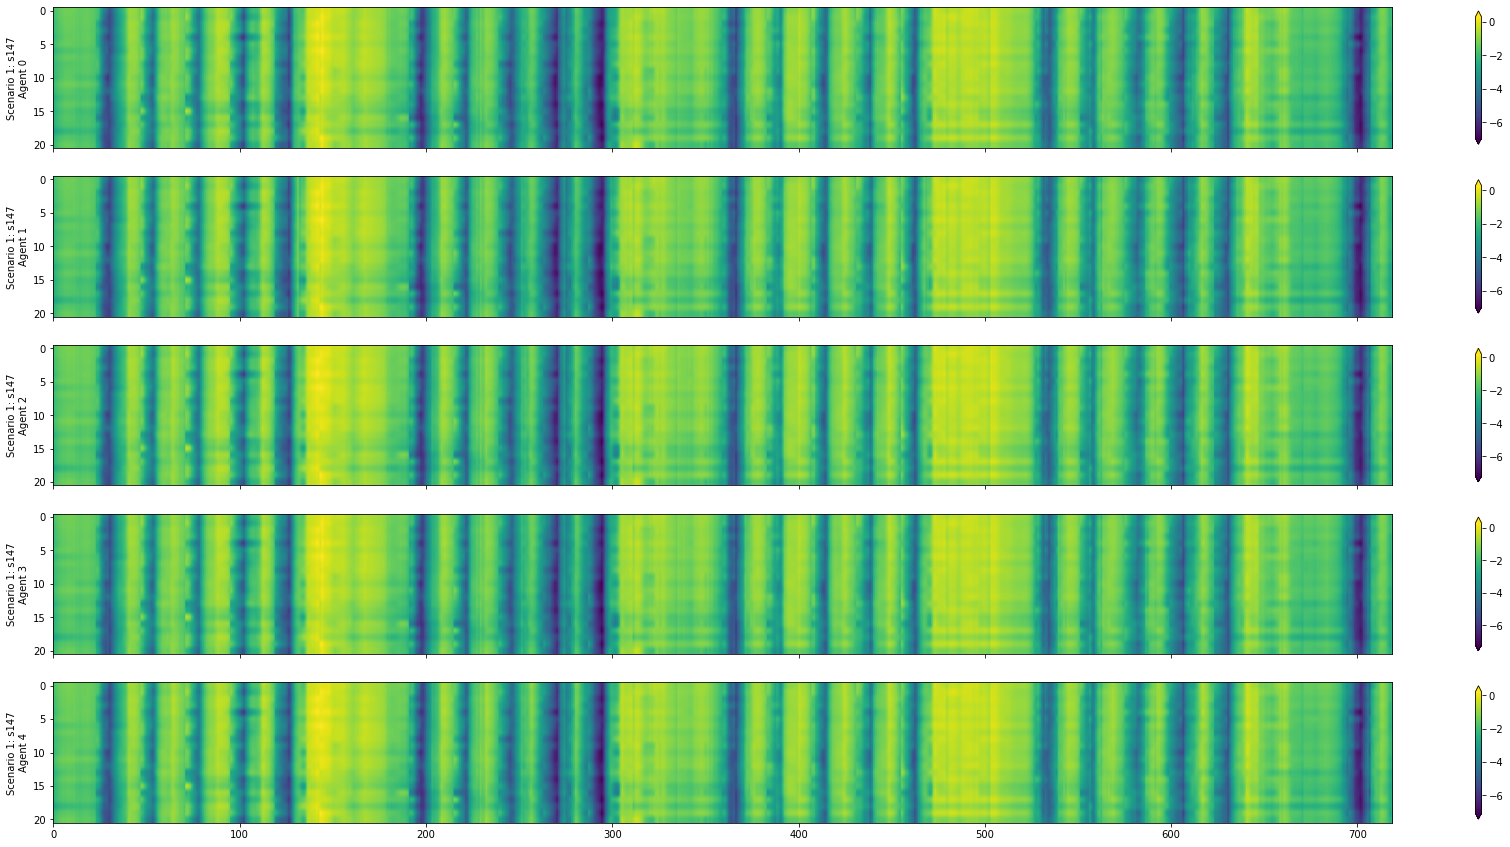

In [33]:
vh.plot_q_values(q_values, fig_width)